In [1]:
import pandas as pd
import pickle
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [49]:
with open('all_scripts.pickle','rb') as read_file:
    all_scripts = pickle.load(read_file)

all_scripts.head()

,Character,Line,Line_Number,Episode
0,Leslie Knope,Hello.,0,s1e01
1,Leslie Knope,Hi.,1,s1e01
2,Leslie Knope,"My name is Leslie Knope, and I work for the Pa...",2,s1e01
3,Leslie Knope,Can I ask you a few questions?,3,s1e01
4,Leslie Knope,"Would you say that you are, ""Enjoying yourself...",4,s1e01


In [50]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
#punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

all_scripts['Line'] = all_scripts.Line.map(alphanumeric) #.str.lower() #.map(punc_lower)
all_scripts.head()

,Character,Line,Line_Number,Episode
0,Leslie Knope,Hello.,0,s1e01
1,Leslie Knope,Hi.,1,s1e01
2,Leslie Knope,"My name is Leslie Knope, and I work for the Pa...",2,s1e01
3,Leslie Knope,Can I ask you a few questions?,3,s1e01
4,Leslie Knope,"Would you say that you are, ""Enjoying yourself...",4,s1e01


In [51]:
all_scripts['Word_Count'] = all_scripts['Line'].str.strip().str.split(" ").str.len()
all_scripts

,Character,Line,Line_Number,Episode,Word_Count
0,Leslie Knope,Hello.,0,s1e01,1
1,Leslie Knope,Hi.,1,s1e01,1
2,Leslie Knope,"My name is Leslie Knope, and I work for the Pa...",2,s1e01,14
3,Leslie Knope,Can I ask you a few questions?,3,s1e01,7
4,Leslie Knope,"Would you say that you are, ""Enjoying yourself...",4,s1e01,28
...,...,...,...,...,...
988,Jerry Gergich,Okay.,988,s7e12,1
989,Ben Wyatt,"You ready, babe?",989,s7e12,3
990,Leslie Knope,Yes.,990,s7e12,1
991,Leslie Knope,I'm ready.,991,s7e12,2


In [52]:
most_episodes = all_scripts.groupby('Character')['Episode'].nunique().sort_values(ascending = False)
most_episodes.head(11)

Character
Leslie Knope     122
Ron Swanson      121
April Ludgate    121
Tom Haverford    118
Andy Dwyer       114
Extra            111
Jerry Gergich    109
Donna Meagle     107
Ann Perkins       99
Ben Wyatt         94
Chris Traeger     74
Name: Episode, dtype: int64

In [53]:
most_episodes = all_scripts.groupby('Character')['Word_Count'].sum().sort_values(ascending = False)
most_episodes.head(11)

Character
Leslie Knope     124460
Tom Haverford     41150
Ron Swanson       34727
Ben Wyatt         32950
Andy Dwyer        32420
Ann Perkins       25280
April Ludgate     22368
Chris Traeger     19796
Extra             10431
Donna Meagle       8286
Jerry Gergich      8063
Name: Word_Count, dtype: int64

In [54]:
ron = all_scripts[ all_scripts['Character'] == 'Ron Swanson' ]
ron.head()

,Character,Line,Line_Number,Episode,Word_Count
38,Ron Swanson,Tonight is our next monthly community outreach...,38,s1e01,9
40,Ron Swanson,That is tonight.,40,s1e01,3
42,Ron Swanson,Leslie will be running it.,42,s1e01,5
43,Ron Swanson,And we need one more.,43,s1e01,5
44,Ron Swanson,Who wants in?,44,s1e01,3


In [55]:
ron['Episode_Text'] = ron.groupby('Episode')['Line'].transform(lambda x : ' '.join(x)) 
ron_episodes = ron.drop(columns = ['Line', 'Line_Number', 'Word_Count'])
ron_episodes.drop_duplicates(inplace = True)
ron_episodes.reset_index(drop=True, inplace = True)
ron_episodes.head()

<ipython-input-55-930731377e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['Episode_Text'] = ron.groupby('Episode')['Line'].transform(lambda x : ' '.join(x))


,Character,Episode,Episode_Text
0,Ron Swanson,s1e01,Tonight is our next monthly community outreach...
1,Ron Swanson,s1e02,"Uh, sure, Paul. What can I do for you? Yeah, a..."
2,Ron Swanson,s1e03,"No comment. Hey, Haverford, maybe one day you'..."
3,Ron Swanson,s1e04,Go to jail? What's going on? Put it in an emai...
4,Ron Swanson,s1e05,The only reason anybody's going to this thing ...


In [56]:
ron['Line_Number'] = ron['Line_Number'].astype(str)
ron.head()

<ipython-input-56-f0be178873ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['Line_Number'] = ron['Line_Number'].astype(str)


,Character,Line,Line_Number,Episode,Word_Count,Episode_Text
38,Ron Swanson,Tonight is our next monthly community outreach...,38,s1e01,9,Tonight is our next monthly community outreach...
40,Ron Swanson,That is tonight.,40,s1e01,3,Tonight is our next monthly community outreach...
42,Ron Swanson,Leslie will be running it.,42,s1e01,5,Tonight is our next monthly community outreach...
43,Ron Swanson,And we need one more.,43,s1e01,5,Tonight is our next monthly community outreach...
44,Ron Swanson,Who wants in?,44,s1e01,3,Tonight is our next monthly community outreach...


In [57]:
ron['Episode_Line_Num'] = ron.Episode + ron.Line_Number
ron.head()

<ipython-input-57-9d3c153b3418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['Episode_Line_Num'] = ron.Episode + ron.Line_Number


,Character,Line,Line_Number,Episode,Word_Count,Episode_Text,Episode_Line_Num
38,Ron Swanson,Tonight is our next monthly community outreach...,38,s1e01,9,Tonight is our next monthly community outreach...,s1e0138
40,Ron Swanson,That is tonight.,40,s1e01,3,Tonight is our next monthly community outreach...,s1e0140
42,Ron Swanson,Leslie will be running it.,42,s1e01,5,Tonight is our next monthly community outreach...,s1e0142
43,Ron Swanson,And we need one more.,43,s1e01,5,Tonight is our next monthly community outreach...,s1e0143
44,Ron Swanson,Who wants in?,44,s1e01,3,Tonight is our next monthly community outreach...,s1e0144


In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#line_sent = analyser.polarity_scores(leslie['Line'])
#line_sent

In [12]:
ron['neg'] = ron['Line'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
ron['neu'] = ron['Line'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
ron['pos'] = ron['Line'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
ron.head()

<ipython-input-12-7d90d59339ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['neg'] = ron['Line'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
<ipython-input-12-7d90d59339ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['neu'] = ron['Line'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
<ipython-input-12-7d90d59339ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Character,Line,Line_Number,Episode,Word_Count,Episode_Text,Episode_Line_Num,neg,neu,pos
38,Ron Swanson,tonight is our next monthly community outreach...,38,s1e01,9,tonight is our next monthly community outreach...,s1e0138,0.0,0.792,0.208
40,Ron Swanson,that is tonight,40,s1e01,3,tonight is our next monthly community outreach...,s1e0140,0.0,1.000,0.000
42,Ron Swanson,leslie will be running it,42,s1e01,5,tonight is our next monthly community outreach...,s1e0142,0.0,1.000,0.000
43,Ron Swanson,and we need one more,43,s1e01,5,tonight is our next monthly community outreach...,s1e0143,0.0,1.000,0.000
44,Ron Swanson,who wants in,44,s1e01,3,tonight is our next monthly community outreach...,s1e0144,0.0,1.000,0.000


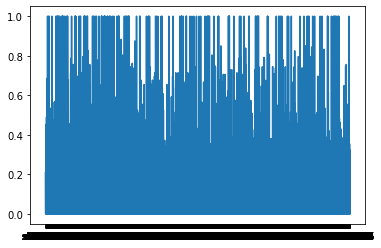

In [13]:
import matplotlib.pyplot as plt

plt.plot(ron.Episode_Line_Num, ron.pos )
plt.show();

In [62]:
ron_episodes['neg'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
ron_episodes['neu'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
ron_episodes['pos'] = ron_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
ron_episodes['season'] = ron_episodes['Episode'].str[:2]
ron_episodes['Word_Count'] = ron_episodes['Episode_Text'].str.strip().str.split(" ").str.len()
ron_episodes.head(50)

,Character,Episode,Episode_Text,neg,neu,pos,season,Word_Count
0,Ron Swanson,s1e01,Tonight is our next monthly community outreach...,0.050,0.849,0.100,s1,220
1,Ron Swanson,s1e02,"Uh, sure, Paul. What can I do for you? Yeah, a...",0.074,0.773,0.153,s1,182
2,Ron Swanson,s1e03,"No comment. Hey, Haverford, maybe one day you'...",0.119,0.824,0.058,s1,132
3,Ron Swanson,s1e04,Go to jail? What's going on? Put it in an emai...,0.083,0.812,0.105,s1,340
4,Ron Swanson,s1e05,The only reason anybody's going to this thing ...,0.016,0.693,0.291,s1,183
5,Ron Swanson,s1e06,"Hey, Mark. This is Beth, my exwife Tammy's bet...",0.099,0.815,0.086,s1,55
6,Ron Swanson,s2e01,"Okay, here's the situation. Someone is on fire...",0.069,0.811,0.121,s2,101
7,Ron Swanson,s2e02,No. Mmmmmm. I did not. I didn't. Okay. Call th...,0.040,0.683,0.277,s2,126
8,Ron Swanson,s2e04,"I will play, too, if only to prove that I can ...",0.042,0.760,0.198,s2,376
9,Ron Swanson,s2e05,"Politically, no, I don't support Chavez. I des...",0.146,0.705,0.149,s2,87


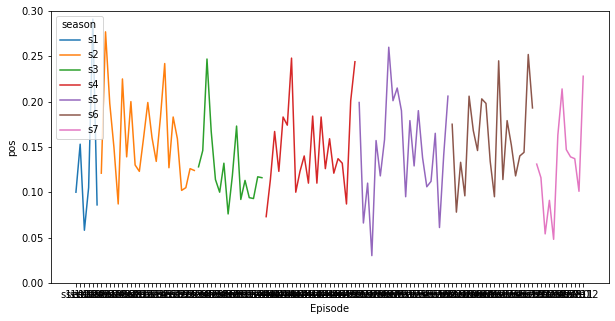

In [60]:
import seaborn as sns 

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'pos', hue = 'season', ax=ax);

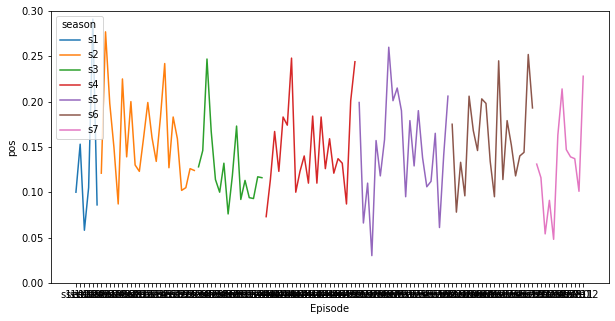

In [61]:
import seaborn as sns 

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'pos', hue = 'season', ax=ax);

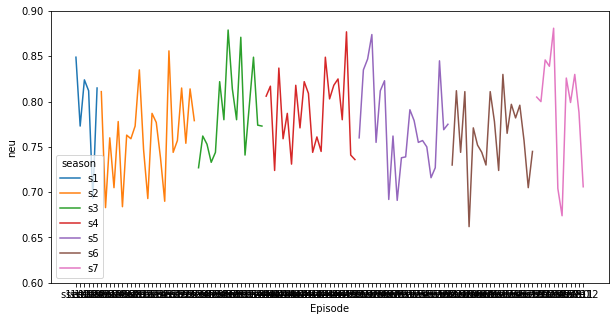

In [68]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(.6, .9)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'neu', hue = 'season', ax=ax);

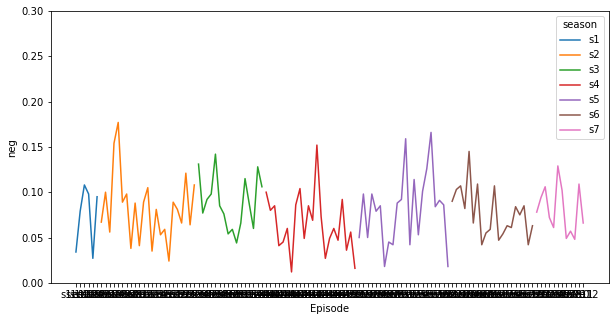

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'neg', hue = 'season', ax=ax);

In [63]:
from textblob import TextBlob

ron_episodes['polar'] = ron_episodes['Episode_Text'].apply(lambda x:TextBlob(x).sentiment[0])
ron_episodes['subj'] = ron_episodes['Episode_Text'].apply(lambda x:TextBlob(x).sentiment[1])
ron_episodes.head()

,Character,Episode,Episode_Text,neg,neu,pos,season,Word_Count,polar,subj
0,Ron Swanson,s1e01,Tonight is our next monthly community outreach...,0.050,0.849,0.100,s1,220,0.064819,0.290947
1,Ron Swanson,s1e02,"Uh, sure, Paul. What can I do for you? Yeah, a...",0.074,0.773,0.153,s1,182,0.234524,0.571196
2,Ron Swanson,s1e03,"No comment. Hey, Haverford, maybe one day you'...",0.119,0.824,0.058,s1,132,-0.276190,0.580952
3,Ron Swanson,s1e04,Go to jail? What's going on? Put it in an emai...,0.083,0.812,0.105,s1,340,0.007127,0.565785
4,Ron Swanson,s1e05,The only reason anybody's going to this thing ...,0.016,0.693,0.291,s1,183,0.135470,0.584615


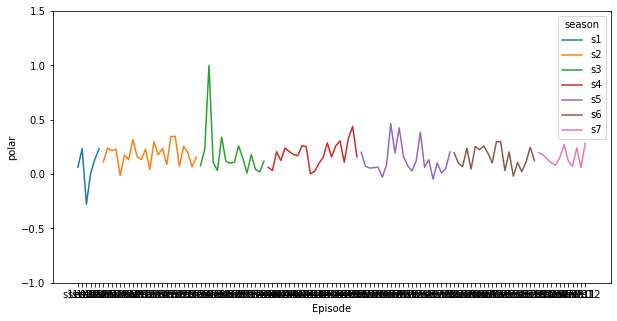

In [65]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(-1, 1.5)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'polar', hue = 'season', ax=ax);

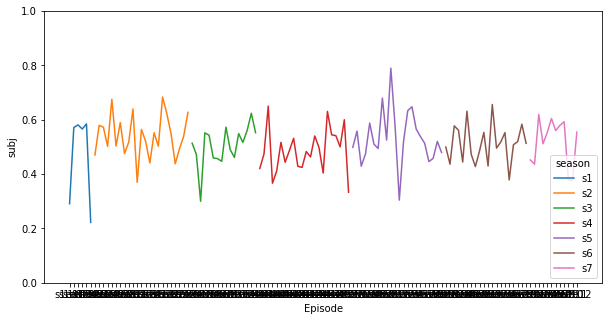

In [67]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, 1)  
sns.lineplot(data = ron_episodes, x = 'Episode', y = 'subj', hue = 'season', ax=ax);

In [69]:
all_ron_text = ron_episodes['Episode_Text']
comb = all_ron_text.str.cat(sep = ' ')


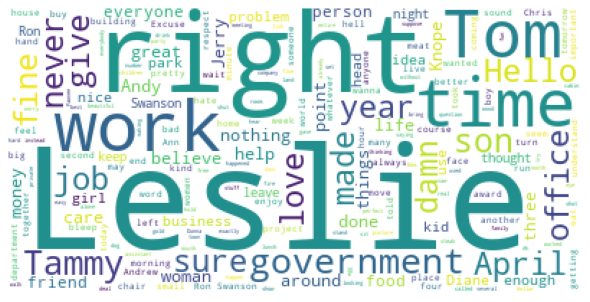

In [70]:
from wordcloud import WordCloud, STOPWORDS
commonwords = ['sorry', 'guys', 'did', 'be', 'get', 'he', 'on', 'been', 'in', 'not', 'are', 'so', 'one', 'to', 'at',
            'for', 'but', 'the', 'me', 'your', 'is', 'this', 'if', 'just', 'that', 'of', 'my', 'do', 'was', 'have',
            'it', 'and', 'with', 'what', 'like', 'want', 'all', 'gonna', 'we', 'you', 're', 'there', 'here', 'okay',
            'no', 'up', 'yeah', 'don', 'they', 'now', 'go', 'well', 'hey', 'uh', 'can', 'who', 'how', 'know', 'as',
            'out', 'would', 'really', 'her', 'about', 'look', 'll', 'am', 've', 'let', 'good', 'an', 'from', 'has',
            'going', 'oh', 'she', 'or', 'got', 'our', 'take', 'when', 'then', 'will', 'some', 'need', 'had', 'say',
            'why', 'could', 'him', 'come', 'should', 'were', 'think', 'might', 'actually', 'them', 'his', 'hi',
            'thanks', 'more', 'because', 'please', 'thank', 'make', 'see', 'any', 'every', 'by', 'after', 'back',
            'very', 'away', 'being', 'way', 'long', 'else', 'most', 'said', 'too', 'other', 'each', 'new', 'into',
            'than', 'still', 'something', 'everything', 'happening', 'start', 'whole', 'talking', 'only', 'anything',
            'us', 'tell', 'talk', 'much', 'through', 'thing', 'sir', 'two', 'little', 'doing', 'guy',
              'does', 'mean', 'ever', 'yes', 'same', 'put', 'over', 'call', 'day', 'their', 'off', 'these', 'where',
              'stop', 'man', 'maybe', 'people', 'down', 'even', 'god', 'first', 'last', 'next', 'old', 'didn', 
               'capsule', 'having', 'name', 'find', 'ask', 'again', 'lot', 'before', 't', 's', 'm' ]


stop_words = list(STOPWORDS)
stopwords = stop_words + commonwords

wc = WordCloud(background_color="white",
                    max_words=200, 
                    stopwords=stopwords)
 
wc.generate(comb)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 